In [25]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

<StemContainer object of 3 artists>

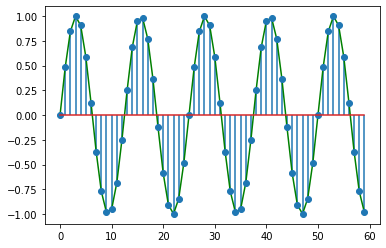

In [2]:
n=np.arange(0,60, 1)
dt=0.08/50
fig, ax=plt.subplots()
ax.plot(n, np.sin(2*np.pi*50*n*dt), color="green")
ax.stem(n, np.sin(2*np.pi*50*n*dt))

### Unit Step Signal

In [3]:
def unit_step(delay, n):
    amp=[]
    for sample in n:
        if sample<delay:
            amp.append(0)
        else:
            amp.append(1)
    return(amp)

<StemContainer object of 3 artists>

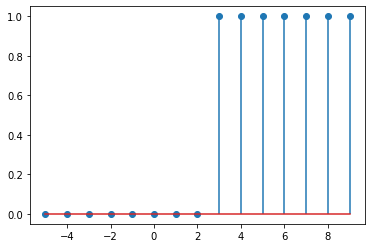

In [4]:
delay=3
n=np.arange(-5, 10, 1)
fun=unit_step(delay, n)
fig, ax=plt.subplots()
ax.stem(n, fun)

### Unit Impulse

In [5]:
def unit_impulse(delay, n):
    amp=[]
    for sample in n:
        if sample==delay:
            amp.append(1)
        else:
            amp.append(0)
    return(amp)

<StemContainer object of 3 artists>

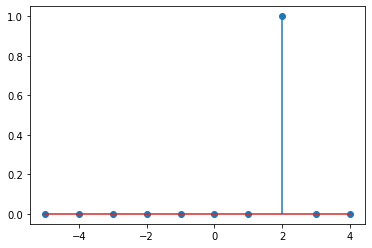

In [6]:
delay=2
n=np.arange(-5, 5)
func=unit_impulse(delay, n)
fig, ax=plt.subplots()
ax.stem(n, func)

### Unit Ramp

In [7]:
def unit_ramp(delay, n):
    amp=[]
    for sample in n:
        if sample<delay:
            amp.append(0)
        else:
            amp.append(sample)
    return(amp)

<StemContainer object of 3 artists>

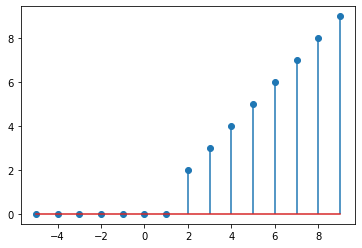

In [8]:
delay=2
n=np.arange(-5, 10)
func=unit_ramp(delay, n)
fig, ax=plt.subplots()
ax.stem(n, func)

### Exponential

In [9]:
def expo(delay, n):
    amp=[]
    for sample in n:
        if sample<delay:
            amp.append(0)
        else:
            amp.append(0.6**sample)
    return(amp)

<StemContainer object of 3 artists>

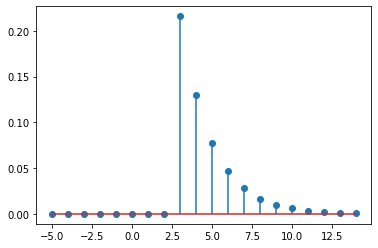

In [10]:
delay=3
n=np.arange(-5, 15, 1)
func=expo(delay, n)
fig, ax=plt.subplots()
ax.stem(n, func)

### Sinusoidal

In [51]:
def sinusoidal(k, n):
    dt=0.07/50
    amp=[]
    for sample in n:
        if sample<0:
            amp.append(0)
        else:
            amp.append(np.cos(2*np.pi*50*dt*(sample-k)))
    return(amp)

In [52]:
def DelayInteract(delay=0):
    n=np.arange(0, 50)
    func=sinusoidal(delay, n)
    #func=np.sin(2*np.pi*50*(n-delay)*dt)
    fig, ax=plt.subplots()
    ax.stem(n, func)
delay=widgets.IntSlider(min=0,
                        max=20,
                        step=1,
                        description='Slider:',
                        value=3)
plot=widgets.interactive_output(DelayInteract, {"delay": delay})
layout=widgets.VBox([delay, plot])
display(layout)